In [1]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-01-28

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# use any 3 tickers, I just use 3 vanguard ETFs.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed
# and add more variables for weights in simulation block.

num_simulation = 1000
assets = ['AAPL', 'COST', 'AXP', 'CMCSA']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2018-1-1')['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,AAPL,COST,AXP,CMCSA
Date,,,,
2018-01-02,41.188164,176.976318,93.103233,37.830128
2018-01-03,41.180992,179.100143,93.677216,37.222191
2018-01-04,41.372276,177.709366,95.235382,37.461685
2018-01-05,41.843307,176.440613,95.452560,37.802494
2018-01-08,41.687901,177.126633,94.574356,37.286671


In [4]:
pf_data.tail() #check companies still open and public at ending date

,AAPL,COST,AXP,CMCSA
Date,,,,
2022-01-24,161.619995,488.899994,158.929993,50.070000
2022-01-25,159.779999,477.320007,173.110001,49.669998
2022-01-26,159.690002,483.470001,175.320007,48.459999
2022-01-27,159.220001,482.519989,171.899994,48.009998
2022-01-28,169.619995,489.779999,176.110001,49.595001


<AxesSubplot:xlabel='Date'>

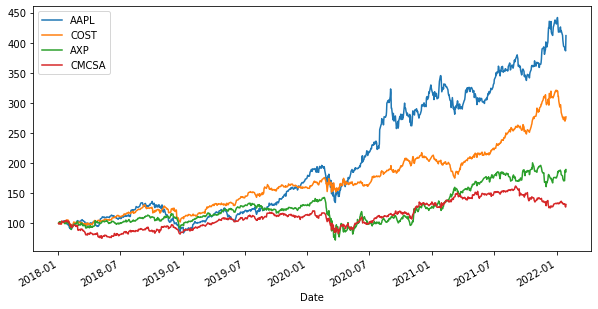

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

AAPL     0.344885
COST     0.248036
AXP      0.155312
CMCSA    0.065981
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,AAPL,COST,AXP,CMCSA
AAPL,0.107426,0.039783,0.054536,0.041822
COST,0.039783,0.049065,0.025199,0.027853
AXP,0.054536,0.025199,0.140159,0.057275
CMCSA,0.041822,0.027853,0.057275,0.078845


In [9]:
log_returns.corr() #get correlation between each pair.

,AAPL,COST,AXP,CMCSA
AAPL,1.000000,0.547976,0.444447,0.454430
COST,0.547976,1.000000,0.303874,0.447817
AXP,0.444447,0.303874,1.000000,0.544841
CMCSA,0.454430,0.447817,0.544841,1.000000


### Expected Portfolio Return:

np.sum(weights * log_returns.mean()) * 250

### Expected Portfolio Variance:

np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

### Expected Portfolio Volatility:

np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

***

In [10]:
num_assets = len(assets)
pfolio_returns = []
pfolio_volatilities = []

w_lst = []

for i in range(num_assets):
    w_lst.append([])

# Followig generate the simulation
for x in range (num_simulation):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    for i in range(num_assets):
        w_lst[i].append(weights[i])

    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

for i in range(num_assets):
    w_lst[i] = np.array(w_lst[i])

# pfolio_returns, pfolio_volatilities, w_lst[0], w_lst[1], w_lst[2]

(array([0.23172395, 0.19464111, 0.20729457, 0.21632201, 0.25579946,
        0.20513232, 0.2337089 , 0.2226999 , 0.20212353, 0.14523397,
        0.28753871, 0.19405523, 0.24447928, 0.22689685, 0.16978399,
        0.22113297, 0.26181764, 0.23409375, 0.135315  , 0.19674311,
        0.21813799, 0.24183349, 0.21514782, 0.1940684 , 0.19578953,
        0.23060295, 0.21119037, 0.23503138, 0.22826115, 0.2322982 ,
        0.24558942, 0.24946763, 0.20153196, 0.19126555, 0.22219035,
        0.17459576, 0.206077  , 0.20157875, 0.23075176, 0.22044602,
        0.19508502, 0.21173081, 0.16433764, 0.22983345, 0.19190861,
        0.2199536 , 0.21905566, 0.19733976, 0.2459698 , 0.26914555,
        0.21727557, 0.24080118, 0.17677498, 0.18881754, 0.18024385,
        0.21416762, 0.18179636, 0.23729049, 0.18321107, 0.18230765,
        0.14869802, 0.16777394, 0.26118902, 0.19802078, 0.2529536 ,
        0.13492855, 0.25646172, 0.19167802, 0.22644777, 0.24553148,
        0.2113342 , 0.19393042, 0.24690665, 0.18

In [13]:
# build simulated portfolios.
df_build = {'Return': pfolio_returns, 'Volatility': pfolio_volatilities}
for w in range(num_assets):
    df_build[assets[w]] = w_lst[w]
portfolios = pd.DataFrame(df_build)

In [14]:
portfolios.head() #checking to see if any error

,Return,Volatility,AAPL,COST,AXP,CMCSA
0,0.231724,0.235312,0.352374,0.267362,0.210338,0.169926
1,0.194641,0.239955,0.230986,0.204969,0.301370,0.262675
2,0.207295,0.236904,0.115114,0.399746,0.407831,0.077309
3,0.216322,0.211172,0.195397,0.515162,0.023019,0.266423
4,0.255799,0.256579,0.582433,0.137671,0.025877,0.254018


In [15]:
portfolios.tail() #checking to see if any error

,Return,Volatility,AAPL,COST,AXP,CMCSA
995,0.171050,0.234707,0.074759,0.296293,0.338924,0.290024
996,0.205354,0.233861,0.309084,0.207131,0.173056,0.310728
997,0.185888,0.232118,0.235846,0.206890,0.184294,0.372970
998,0.226542,0.259831,0.341184,0.163196,0.399551,0.096069
999,0.169940,0.259582,0.109752,0.174373,0.465728,0.250147


In [16]:
portfolios.sort_values(by=['Volatility']) # Sort by volatility. Theoretically the portfolio with lowest valatility is the best one.

,Return,Volatility,AAPL,COST,AXP,CMCSA
885,0.205020,0.205442,0.012952,0.700439,0.088521,0.198088
102,0.195447,0.206196,0.052331,0.609583,0.043580,0.294505
391,0.219578,0.207126,0.072379,0.671052,0.125849,0.130720
396,0.189658,0.207425,0.044085,0.554007,0.117788,0.284120
625,0.224949,0.207508,0.083095,0.691776,0.110275,0.114854
...,...,...,...,...,...,...
114,0.184900,0.297150,0.159325,0.088539,0.653341,0.098795
668,0.214229,0.298152,0.287866,0.067741,0.622720,0.021674
376,0.166682,0.298486,0.036688,0.155568,0.695690,0.112054
253,0.203868,0.302078,0.201809,0.113415,0.682342,0.002434


Text(0, 0.5, 'Expected Return')

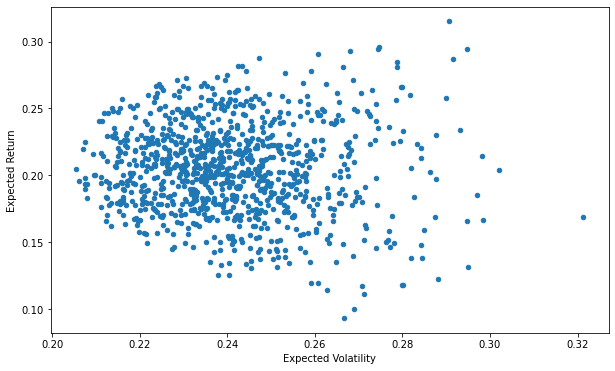

In [17]:
# check the plot
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [18]:
#generate path and name then export
path = 'results/'
name = '_'.join(assets) + '.csv'
path_name = path + name 
portfolios.sort_values(by=['Volatility']).to_csv(path_name)

In [24]:
# money amount calculation, for demo use only, 
sorted_portfolios = portfolios.sort_values(by=['Volatility']).head(1)

total_investment = 25000
print("Intend to invest ${:.2f}".format(total_investment) + " total.")

for i in range(len(assets)):
    inv = total_investment * sorted_portfolios[assets[i]].iloc[0]
    print("invest in " + assets[i] + " for ${:.2f}".format(inv) + ".")


Intend to invest $25000.00 total.
invest in AAPL for $323.81.
invest in COST for $17510.97.
invest in AXP for $2213.03.
invest in CMCSA for $4952.19.
